# Introduction

This project will examine trends in UK weather data collected by the Met Office. The Met Office provides data for 37 different weather stations, however the data is not consistent for all stations. For example, some stations have closed or are missing data from certain years. Because of this, I did a visual inspection of the data before downloading and only downloaded txt files for stations that had consistent data and were not closed. This ensures that my LUT below stays consistent and mitigates the need for exclusions in my dataframe/variable creation. The excluded stations are Cwmystwyth, Ringway, and Southampton

[Link to all data](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data)

In [1]:
#importing libraries and packages
import os
import urllib
import time
import os
import urllib.request
import csv
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from operator import itemgetter

In [2]:
#create LUT

#Aberporth
station1_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/aberporthdata.txt'

#Armagh
station2_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/armaghdata.txt'

#Ballypatrick 
station3_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/ballypatrickdata.txt'

#Bradford
station4_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/bradforddata.txt'

#Braemar
station5_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/braemardata.txt'
 
#Camborne
station6_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambornedata.txt'

#Cambridge
station7_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cambridgedata.txt'

#Cardiff
station8_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/cardiffdata.txt'

#Chivernor
station9_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/chivenordata.txt'

#Dunstaffnage
station10_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/dunstaffnagedata.txt'

#Durham
station11_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/durhamdata.txt'

#Eastbourne
station12_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/eastbournedata.txt'

#Eskdalemuir
station13_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/eskdalemuirdata.txt'

#Heathrow
station14_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt'

#Hurn
station15_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/hurndata.txt'

#Lerwick
station16_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/lerwickdata.txt'

#Leuchars
station17_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/leucharsdata.txt'

#Lowestoft
station18_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/lowestoftdata.txt'

#Manston
station19_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/manstondata.txt'

#Nairn
station20_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/nairndata.txt'

#Newton Rigg
station21_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/newtonriggdata.txt'
    
#Oxford
station22_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt'

#Paisley
station23_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/paisleydata.txt'

#Rossonwye
station24_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/rossonwyedata.txt'

#Shawbury
station25_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/shawburydata.txt'

#Sheffield
station26_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/sheffielddata.txt'

#Stornoway
station27_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/stornowaydata.txt'

#Sutton Bonington
station28_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/suttonboningtondata.txt'

#Tiree
station29_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/tireedata.txt'

#Valley
station30_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/valleydata.txt'

#Waddington
station31_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/waddingtondata.txt'

#Whitby
station32_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/whitbydata.txt'

#Wick Airport
station33_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/wickairportdata.txt'

#Yeovilton
station34_URL = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/yeoviltondata.txt'

In [3]:
#function to download txt files
def download(url, filename=None):
    if filename is None:
        filename = url.split('/')[-1]

    filepath = os.path.join(os.getcwd(), filename)

    if os.path.isfile(filepath):
        print(f'File {filepath} already exists')
        return filepath

    print(f"Downloading '{filename}'")
    urllib.request.urlretrieve(url, filepath)
    print(f"Download complete")

    return filepath

In [4]:
#download txt files
filepath = [station1_URL, station2_URL, station3_URL, station4_URL, station5_URL, station6_URL, station7_URL, station8_URL, station9_URL, station10_URL, station11_URL, station12_URL, station13_URL, station14_URL, station15_URL, station16_URL, station17_URL, station18_URL, station19_URL, station20_URL, station21_URL, station22_URL, station23_URL, station24_URL, station25_URL, station26_URL, station27_URL, station28_URL, station29_URL, station30_URL, station31_URL, station32_URL, station33_URL, station34_URL]
for i in filepath:
        download(i)

File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/aberporthdata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/armaghdata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/ballypatrickdata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/bradforddata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/braemardata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/cambornedata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/cambridgedata.txt already exists
File /Users/raylesser/Documents/theory-and-applications-of-data-analytics/Projects/Project 1/cardiffdata.txt already exist

In [5]:
def file_load(filename, outfile, stationFile):
    #returns downloaded data from weather stations
    
    #open txt files, clean white space and empty lines, and re-label data
    with open(filename, 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split() for line in stripped if line.strip())
        
        with open(outfile, 'w') as out_file:
            writer = csv.writer(out_file)
            if lines:
                writer.writerow(['yyyy', 'month', 'tmax(degC)', 'tmin(degC)', 'af(days)', 'rain(mm)', 'sun(hours)'])
                writer.writerows(lines)
                
        #open file and reformat each row to csv
        #then redownload as csv
        #then delete original file
        with open(outfile, newline='') as in_file:
            with open(stationFile, 'w', newline='') as out_file:
                writer = csv.writer(out_file)
                for row in csv.reader(in_file):
                    if row:
                        writer.writerow(row)
                        
        os.remove(outfile)          

In [6]:
#creates csv files
current_directory = os.getcwd()

txt_file_location = current_directory

files_sorted = sorted(os.listdir(txt_file_location))

i = 1

for file in files_sorted:
    file_title = os.fsdecode(file)
    
    if file_title.endswith(".txt"):
        full_path = os.path.join(txt_file_location, file_title)
        edited_csv_path = os.path.join(current_directory, f'{file_title[:-3]}edited.csv')
        final_csv_path = os.path.join(current_directory, f'{file_title[:-3]}final.csv')
        
        file_load(full_path, edited_csv_path, final_csv_path)
        file_load(full_path, f'weatherdata{i}edited.csv', f'weatherdata{i}.final.csv')
        
        i += 1 
    else:
        continue

In [7]:
#i want to write the variables dynamically so am using a dictionary
main_df_variables = {}

#format variable name
template = "df{}"

#create variables
for i in range(1,len(filepath)+1): #replace with len of dictionary
    variable_name = template.format(i)
    main_df_variables[variable_name] = i

#check the variables are correct
print(main_df_variables)

#initialize
x = 1

#create dataframes
for x in main_df_variables:
    csv_files = f'weatherdata{main_df_variables[x]}.final.csv'
    with open(csv_files, 'r') as file:
        csv_f = csv.reader(file, delimiter=",")
        row_index = 0
        skip_row_8 = False
        
        for row in csv_f:
            row_index += 1  #increment the row index
            if row_index == 8 and (not row[0].strip().isnumeric() or not row[0].strip().isdigit()):
                skip_row_8 = True
                break  
    if skip_row_8:
        main_df_variables[x] = pd.read_csv(csv_files, skiprows=[1,2,3,4,5,6,7,8], usecols=[0,1,2,3,4,5,6])
    else:
        main_df_variables[x] = pd.read_csv(csv_files, skiprows=[1,2,3,4,5,6,7], usecols=[0,1,2,3,4,5,6])

{'df1': 1, 'df2': 2, 'df3': 3, 'df4': 4, 'df5': 5, 'df6': 6, 'df7': 7, 'df8': 8, 'df9': 9, 'df10': 10, 'df11': 11, 'df12': 12, 'df13': 13, 'df14': 14, 'df15': 15, 'df16': 16, 'df17': 17, 'df18': 18, 'df19': 19, 'df20': 20, 'df21': 21, 'df22': 22, 'df23': 23, 'df24': 24, 'df25': 25, 'df26': 26, 'df27': 27, 'df28': 28, 'df29': 29, 'df30': 30, 'df31': 31, 'df32': 32, 'df33': 33, 'df34': 34}


In [8]:
noDash_df = {}

#format variable name
noDash_df_template = "noDash_df{}"

#create variables
for i in range(1, len(main_df_variables) + 1):
    df_key = f'df{i}'
    noDash_df_variable = noDash_df_template.format(i)
    #replace with number far out of scope to filter later
    noDash_df[noDash_df_variable] = main_df_variables[df_key].replace('---', -5000)

#check the variables are correct
print(noDash_df)

{'noDash_df1':      yyyy  month tmax(degC) tmin(degC) af(days)  rain(mm) sun(hours)
0    1941      2      -5000      -5000    -5000      69.1      -5000
1    1941      3      -5000      -5000    -5000      76.2      -5000
2    1941      4      -5000      -5000    -5000      33.7      -5000
3    1941      5      -5000      -5000    -5000      51.3      -5000
4    1941      6      -5000      -5000    -5000      25.7      -5000
..    ...    ...        ...        ...      ...       ...        ...
991  2023      9       19.2       13.5        0      81.0     125.4#
992  2023     10       14.7       10.1        0     133.4      71.9#
993  2023     11       10.8        6.8        1     108.4      46.7#
994  2023     12       10.0        6.6        2     168.4      29.3#
995  2024      1        7.7        3.5        7      97.4      59.2#

[996 rows x 7 columns], 'noDash_df2':       yyyy  month tmax(degC) tmin(degC) af(days) rain(mm) sun(hours)
0     1853      2      -5000      -5000    -5000 

In [9]:
#creating dictionary to store sliced dataframes
#I had previously done this dynamically like above, but changed around how I was doing things at the last minute
#so decided to proceed manually to avoid errors
sliced_df = {
    'sliced_df1': None,
    'sliced_df2': None,
    'sliced_df3': None,
    'sliced_df4': None,
    'sliced_df5': None,
    'sliced_df6': None,
    'sliced_df7': None,
    'sliced_df8': None,
    'sliced_df9': None,
    'sliced_df10': None,
    'sliced_df11': None,
    'sliced_df12': None,
    'sliced_df13': None,
    'sliced_df14': None,
    'sliced_df15': None,
    'sliced_df16': None,
    'sliced_df17': None,
    'sliced_df18': None,
    'sliced_df19': None,
    'sliced_df20': None,
    'sliced_df21': None,
    'sliced_df22': None,
    'sliced_df23': None,
    'sliced_df24': None,
    'sliced_df25': None,
    'sliced_df26': None,
    'sliced_df27': None,
    'sliced_df28': None,
    'sliced_df29': None,
    'sliced_df30': None,
    'sliced_df31': None,
    'sliced_df32': None,
    'sliced_df33': None,
    'sliced_df34': None
}

In [10]:
#these are the years with most consistent data across all stations
years_to_slice = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

#i want to slice the data in noDash_df based on my specified years, and add those values to the corresponding key indices in sliced_df
for idx, (_, df) in enumerate(noDash_df.items()):
    #get the corresponding index in sliced_df
    key = list(sliced_df.keys())[idx]
    #slice df
    sliced_dfs = [df[df['yyyy'] == value] for value in years_to_slice]
    #assign df to the corresponding variable in sliced_df dict
    sliced_df[key] = df[df['yyyy'].isin(years_to_slice)]

print(sliced_df)

{'sliced_df1':      yyyy  month tmax(degC) tmin(degC) af(days)  rain(mm) sun(hours)
671  1997      1        5.8        1.0       13       4.6       95.7
672  1997      2        9.2        4.2        0      85.0       68.1
673  1997      3       10.8        5.6        0      21.6      146.9
674  1997      4       12.3        6.0        0      14.8      184.5
675  1997      5       14.7        7.9        0      72.6      258.1
..    ...    ...        ...        ...      ...       ...        ...
978  2022      8       20.6       14.1        0      10.8     224.8#
979  2022      9       17.3       12.3        0      89.8      77.7#
980  2022     10       15.6       10.5        0     107.4      97.5#
981  2022     11       11.9        7.5        0     118.2      51.2#
982  2022     12        7.6        2.3        9      80.6      61.0#

[312 rows x 7 columns], 'sliced_df2':       yyyy  month tmax(degC) tmin(degC) af(days) rain(mm) sun(hours)
1727  1997      1        6.7        2.2       10 

In [11]:
noChar_df = {
    'noChar_df1': None,
    'noChar_df2': None,
    'noChar_df3': None,
    'noChar_df4': None,
    'noChar_df5': None,
    'noChar_df6': None,
    'noChar_df7': None,
    'noChar_df8': None,
    'noChar_df9': None,
    'noChar_df10': None,
    'noChar_df11': None,
    'noChar_df12': None,
    'noChar_df13': None,
    'noChar_df14': None,
    'noChar_df15': None,
    'noChar_df16': None,
    'noChar_df17': None,
    'noChar_df18': None,
    'noChar_df19': None,
    'noChar_df20': None,
    'noChar_df21': None,
    'noChar_df22': None,
    'noChar_df23': None,
    'noChar_df24': None,
    'noChar_df25': None,
    'noChar_df26': None,
    'noChar_df27': None,
    'noChar_df28': None,
    'noChar_df29': None,
    'noChar_df30': None,
    'noChar_df31': None,
    'noChar_df32': None,
    'noChar_df33': None,
    'noChar_df34': None,
}

In [12]:
for idx, (_, df) in enumerate(sliced_df.items()):
    key = list(noChar_df.keys())[idx]
    #df to store data
    noChar_data = pd.DataFrame()
    
    for column in df.columns:
        #convert to string
        noChar_column = df[column].astype(str)
        #replace instances of #, *, $, Change, and all with blank space
        #I encountered errors after only removing the first three characters and upon visual inspection found there were 2 unique cases with different characters so also removed them
        noChar_column = noChar_column.str.replace('#', '').str.replace('*', '').str.replace('$', '').str.replace('Change', '').str.replace('all', '')
        #assign cleaned column to new df
        noChar_data[column] = noChar_column
    
    #update noChar_df dict with new df
    noChar_df[key] = noChar_data

#check
print(noChar_df)

{'noChar_df1':      yyyy month tmax(degC) tmin(degC) af(days) rain(mm) sun(hours)
671  1997     1        5.8        1.0       13      4.6       95.7
672  1997     2        9.2        4.2        0     85.0       68.1
673  1997     3       10.8        5.6        0     21.6      146.9
674  1997     4       12.3        6.0        0     14.8      184.5
675  1997     5       14.7        7.9        0     72.6      258.1
..    ...   ...        ...        ...      ...      ...        ...
978  2022     8       20.6       14.1        0     10.8      224.8
979  2022     9       17.3       12.3        0     89.8       77.7
980  2022    10       15.6       10.5        0    107.4       97.5
981  2022    11       11.9        7.5        0    118.2       51.2
982  2022    12        7.6        2.3        9     80.6       61.0

[312 rows x 7 columns], 'noChar_df2':       yyyy month tmax(degC) tmin(degC) af(days) rain(mm) sun(hours)
1727  1997     1        6.7        2.2       10     18.9       20.5
1728  

In [13]:
#dict to store my final df that I will use for calculations
final_df = {
    'final_df1': None,
    'final_df2': None,
    'final_df3': None,
    'final_df4': None,
    'final_df5': None,
    'final_df6': None,
    'final_df7': None,
    'final_df8': None,
    'final_df9': None,
    'final_df10': None,
    'final_df11': None,
    'final_df12': None,
    'final_df13': None,
    'final_df14': None,
    'final_df15': None,
    'final_df16': None,
    'final_df17': None,
    'final_df18': None,
    'final_df19': None,
    'final_df20': None,
    'final_df21': None,
    'final_df22': None,
    'final_df23': None,
    'final_df24': None,
    'final_df25': None,
    'final_df26': None,
    'final_df27': None,
    'final_df28': None,
    'final_df29': None,
    'final_df30': None,
    'final_df31': None,
    'final_df32': None,
    'final_df33': None,
    'final_df34': None
}

In [14]:
#iterate over dict containing df
for idx, (key, df) in enumerate(noChar_df.items(), start=1):
    #convert to float
    float_df = df.applymap(pd.to_numeric, errors='coerce')
    #assign df to corresponding key index in final_df
    final_df[f'final_df{idx}'] = float_df

#check
print(final_df)

{'final_df1':      yyyy  month  tmax(degC)  tmin(degC)  af(days)  rain(mm)  sun(hours)
671  1997      1         5.8         1.0        13       4.6        95.7
672  1997      2         9.2         4.2         0      85.0        68.1
673  1997      3        10.8         5.6         0      21.6       146.9
674  1997      4        12.3         6.0         0      14.8       184.5
675  1997      5        14.7         7.9         0      72.6       258.1
..    ...    ...         ...         ...       ...       ...         ...
978  2022      8        20.6        14.1         0      10.8       224.8
979  2022      9        17.3        12.3         0      89.8        77.7
980  2022     10        15.6        10.5         0     107.4        97.5
981  2022     11        11.9         7.5         0     118.2        51.2
982  2022     12         7.6         2.3         9      80.6        61.0

[312 rows x 7 columns], 'final_df2':       yyyy  month  tmax(degC)  tmin(degC)  af(days)  rain(mm)  sun(hours

In [15]:
#new dictionary with station names so I can use my LUT to rename the keys so I know which station they are for
stations = {
    'Aberporth': None,
    'Armagh': None,
    'Ballypatrick': None,
    'Bradford': None,
    'Braemar': None,
    'Camborne': None,
    'Cambridge': None,
    'Cardiff': None,
    'Chivernor': None,
    'Dunstaffnage': None,
    'Durham': None,
    'Eastbourne': None,
    'Eskdalemuir': None,
    'Heathrow': None,
    'Hurn': None,
    'Lerwick': None,
    'Leuchars': None,
    'Lowestoft': None,
    'Manston': None,
    'Nairn': None,
    'Newton Rigg': None,
    'Oxford': None,
    'Paisley': None,
    'Rossonwye': None,
    'Shawbury': None,
    'Sheffield': None,
    'Stornoway': None,
    'Sutton Bonington': None,
    'Tiree': None,
    'Valley': None,
    'Waddington': None,
    'Whitby': None,
    'Wick Airport': None,
    'Yeovilton': None
}

In [16]:
#here I am creating a new column that will contain the average temp change for each row based off tmin and tmax
#Need tofilter out the -5000 values that I used in place of '---'
    #I did this rather than replace 0 so it would not skew the data

for key, df in final_df.items():
    #empty list to store values
    avg_temp_change = []
    for idx, row in df.iterrows():
        if row['tmax(degC)'] != -5000 or row['tmin(degC)'] != -5000:
            #calculate avg temp change if either tmax or tmin are not -5000
            #using option where I compare the difference between tmax and tmin and using the difference as a percentage of tmax
            avg_temp_change.append(((row['tmax(degC)'] - row['tmin(degC)']) / row['tmax(degC)']) * 100)
        else:
            avg_temp_change.append(np.nan) #insert NaN if cannot be calculated
    #assign result to new column
    df['avg_tempChange'] = avg_temp_change

#check
print(final_df)

{'final_df1':      yyyy  month  tmax(degC)  tmin(degC)  af(days)  rain(mm)  sun(hours)  \
671  1997      1         5.8         1.0        13       4.6        95.7   
672  1997      2         9.2         4.2         0      85.0        68.1   
673  1997      3        10.8         5.6         0      21.6       146.9   
674  1997      4        12.3         6.0         0      14.8       184.5   
675  1997      5        14.7         7.9         0      72.6       258.1   
..    ...    ...         ...         ...       ...       ...         ...   
978  2022      8        20.6        14.1         0      10.8       224.8   
979  2022      9        17.3        12.3         0      89.8        77.7   
980  2022     10        15.6        10.5         0     107.4        97.5   
981  2022     11        11.9         7.5         0     118.2        51.2   
982  2022     12         7.6         2.3         9      80.6        61.0   

     avg_tempChange  
671       82.758621  
672       54.347826  
673    

In [17]:
#reassign keys to station names
for (key_stations, _), (_, value) in zip(stations.items(), final_df.items()):
    stations[key_stations] = value
print(stations)

{'Aberporth':      yyyy  month  tmax(degC)  tmin(degC)  af(days)  rain(mm)  sun(hours)  \
671  1997      1         5.8         1.0        13       4.6        95.7   
672  1997      2         9.2         4.2         0      85.0        68.1   
673  1997      3        10.8         5.6         0      21.6       146.9   
674  1997      4        12.3         6.0         0      14.8       184.5   
675  1997      5        14.7         7.9         0      72.6       258.1   
..    ...    ...         ...         ...       ...       ...         ...   
978  2022      8        20.6        14.1         0      10.8       224.8   
979  2022      9        17.3        12.3         0      89.8        77.7   
980  2022     10        15.6        10.5         0     107.4        97.5   
981  2022     11        11.9         7.5         0     118.2        51.2   
982  2022     12         7.6         2.3         9      80.6        61.0   

     avg_tempChange  
671       82.758621  
672       54.347826  
673    

In [18]:
#writing function to easily calculate the mean for each column
def mean(dictionary, column_name):
    mean_results = []

    for key, df in dictionary.items():
        #filter out -5000 values
        filtered_values = df[df[column_name] != -5000][column_name]
        #calculate mean
        mean_value = filtered_values.mean()
        mean_results.append((key, mean_value))

    return mean_results

#assign result to new list
overall_tmax = mean(stations, 'tmax(degC)')
overall_tmin = mean(stations, 'tmin(degC)')
overall_af = mean(stations, 'af(days)')
overall_rain = mean(stations, 'rain(mm)') 
overall_sun = mean(stations, 'sun(hours)')


#check
print(overall_tmax)
print(overall_tmin)
print(overall_af)
print(overall_rain)
print(overall_sun)

[('Aberporth', 12.946153846153846), ('Armagh', 13.715705128205128), ('Ballypatrick', 11.912624584717607), ('Bradford', 13.329166666666666), ('Braemar', 11.04822006472492), ('Camborne', 13.772115384615384), ('Cambridge', 15.066666666666666), ('Cardiff', 15.1375), ('Chivernor', 14.791935483870967), ('Dunstaffnage', 12.913576158940396), ('Durham', 13.382051282051284), ('Eastbourne', 14.782692307692306), ('Eskdalemuir', 11.60673076923077), ('Heathrow', 15.83044871794872), ('Hurn', 15.300641025641024), ('Lerwick', 9.92147435897436), ('Leuchars', 12.84423076923077), ('Lowestoft', 14.050819672131148), ('Manston', 14.506451612903225), ('Nairn', 12.717434210526317), ('Newton Rigg', 12.74070512820513), ('Oxford', 15.241666666666665), ('Paisley', 13.304487179487179), ('Rossonwye', 14.926602564102563), ('Shawbury', 14.065384615384614), ('Sheffield', 13.878525641025643), ('Stornoway', 11.640384615384615), ('Sutton Bonington', 14.466666666666665), ('Tiree', 12.044871794871796), ('Valley', 13.5044871

In [19]:
def plot_histogram(data, x_label, y_label, title, start_range):
    #using value in 0 index from tuples for x-axis label
    x_values = [x[0] for x in data]

    #using value in 1 index from tuples for y-axis label
    y_values = [y[1] for y in data]

    colors = np.random.rand(len(x_values), 3)
    plt.figure(figsize=(12, 6))  
    plt.bar(x_values, y_values, color=colors, width=0.5)
    plt.xticks(rotation=45,)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(start_range, None)
    plt.grid(axis='y')
    plt.title(title)

    plt.show()

# Task 1 Charts

The data below shows the means for various weather measurements from the Met Office's UK Weather Station data, from 1997-2022. 

Data is consistent across all metrics except Sunshine Duration, which does not have any data from 1997-2022 for the following stations: Cardiff, Chivernor, Newton Rigg, and Wick Airport


I am representing this information in histogram charts as I am comparing independent data sets with one value assigned to each. This allows the reader to clearly see the value for each data set, easily compare them to each other, and identify outliers.

To create these data views, I took the following steps:

1. Download txt files from Met Office
2. Clean txt files and select data and convert to csv
3. Create and store csv data in dataframes
4. Clean cells containing (---)
5. Slice data based on specified years (1997-2022)
6. Remove special characters and text from cells so that only numeric values remain
7. Convert values to floats to allow calculations
8. Reassign dataframe variables to refer back to the original station names
9. Perform mean calculations on each column, ensuring cells with -5000 are not included
10. Plot using stations for the x-axis and relevant weather data for the y-axis




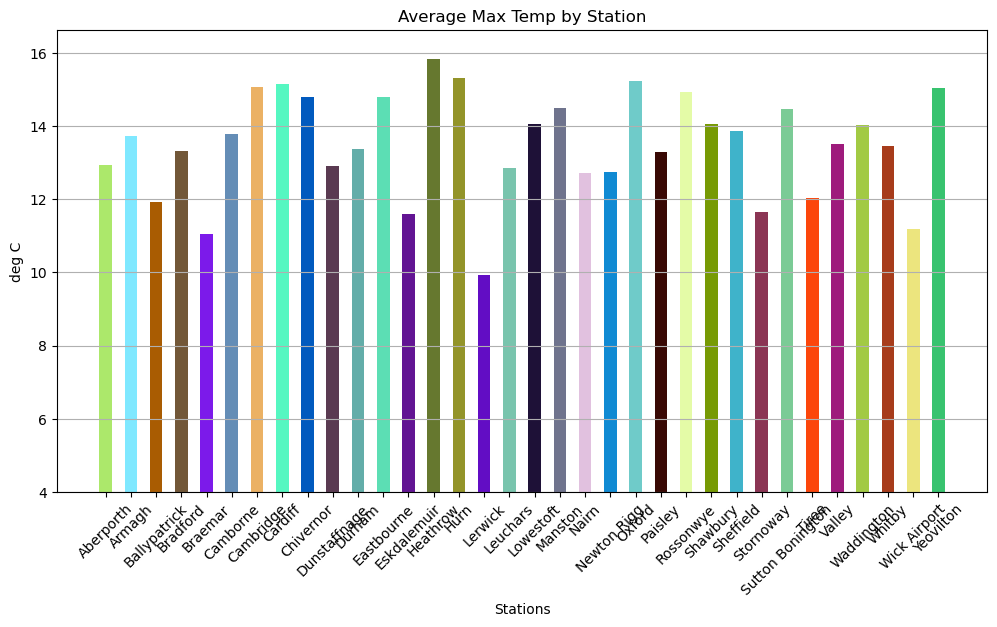

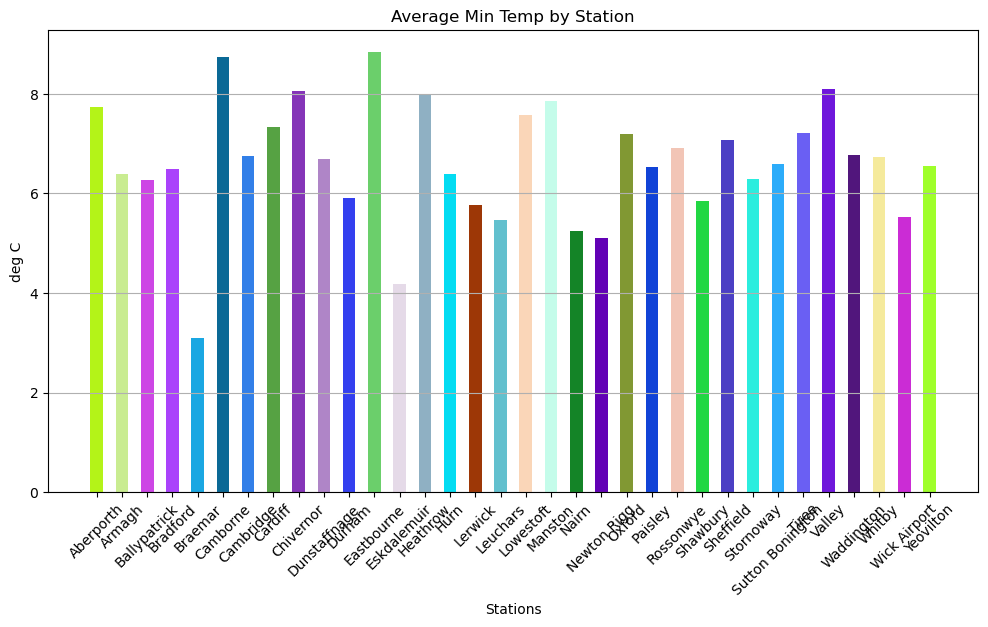

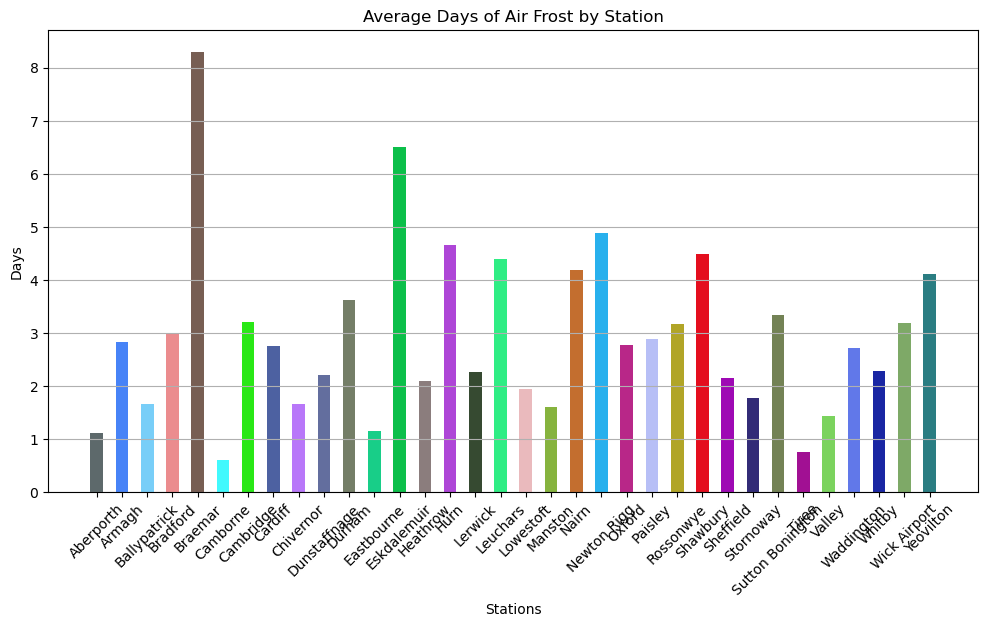

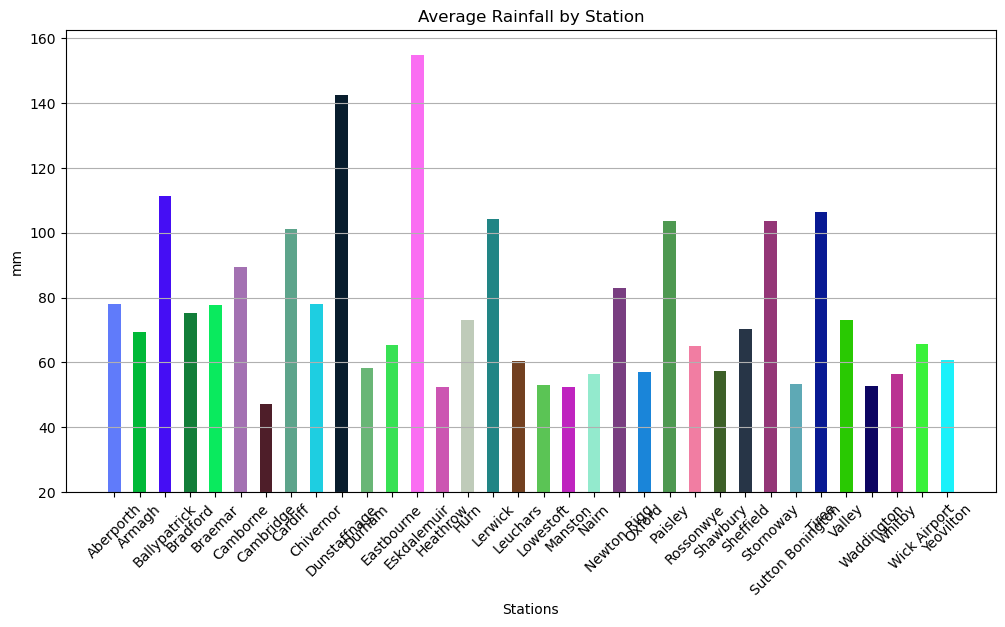

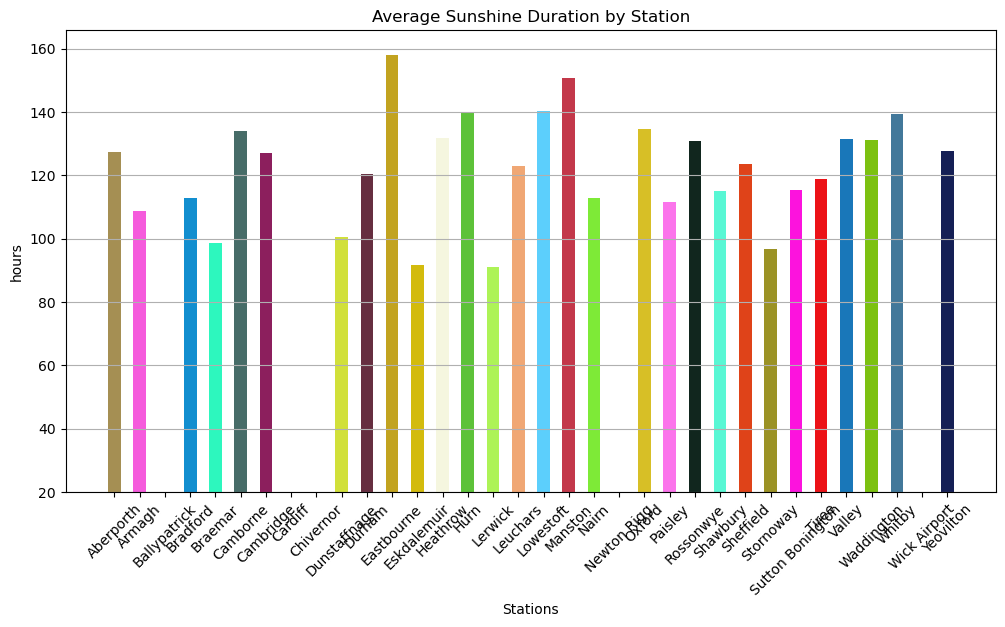

In [20]:
#call function to plot histograms for all columns
plot_histogram(overall_tmax, 'Stations', 'deg C', 'Average Max Temp by Station', 4)
plot_histogram(overall_tmin, 'Stations', 'deg C', 'Average Min Temp by Station', None)
plot_histogram(overall_af, 'Stations', 'Days', 'Average Days of Air Frost by Station', None)
plot_histogram(overall_rain, 'Stations', 'mm', 'Average Rainfall by Station', 20)
plot_histogram(overall_sun, 'Stations', 'hours', 'Average Sunshine Duration by Station', 20)

In [21]:
#calculating overall avg temp change to determine which are highest and lowest
overall_avg_tempChange = []
    
for key, df in stations.items():
    #getting mean of avg_tempChange column, which stores % change between tmin and tmax
    result = df['avg_tempChange'].mean()
    #add tuple to list
    overall_avg_tempChange.append((key, result))

print(overall_avg_tempChange)
#print the min and max so I know which stations to include in chart
print(max(overall_avg_tempChange))
print(min(overall_avg_tempChange))

[('Aberporth', 43.37490247755024), ('Armagh', 57.9824137464906), ('Ballypatrick', 160.8607988448653), ('Bradford', 56.91773470141385), ('Braemar', 89.79568535831561), ('Camborne', 38.58842362705323), ('Cambridge', 60.07620280696728), ('Cardiff', 55.759898645184016), ('Chivernor', 127.72632095016867), ('Dunstaffnage', 51.834328321393095), ('Durham', 61.53821224861491), ('Eastbourne', 43.60236110623513), ('Eskdalemuir', 74.92315522351652), ('Heathrow', 53.66660008479996), ('Hurn', 63.13270572048392), ('Lerwick', 47.05504685925995), ('Leuchars', 64.23534681120557), ('Lowestoft', 50.643829966322365), ('Manston', 50.12486806952828), ('Nairn', 65.24930649995447), ('Newton Rigg', 67.79758427520323), ('Oxford', 57.13819387887024), ('Paisley', 56.556126555361494), ('Rossonwye', 58.40650088400238), ('Shawbury', 64.89031106922542), ('Sheffield', 53.42608643607645), ('Stornoway', 49.82193835596601), ('Sutton Bonington', 59.398051617012264), ('Tiree', 42.74570521047279), ('Valley', 42.9109033497169

In [22]:
#unpack dictionary to call each station name directly
for key, value in stations.items():
        globals()[key] = value
print(Yeovilton)

     yyyy  month  tmax(degC)  tmin(degC)  af(days)  rain(mm)  sun(hours)  \
387  1997      1         5.6        -0.8        18       8.6        40.8   
388  1997      2        10.6         3.7         5      74.4        57.0   
389  1997      3        12.6         4.0         4      31.5       110.3   
390  1997      4        14.8         2.5         9      19.4       202.1   
391  1997      5        17.2         6.5         1      55.6       233.0   
..    ...    ...         ...         ...       ...       ...         ...   
694  2022      8        25.7        12.8         0      15.4       225.0   
695  2022      9        19.8         9.9         0      57.4       122.3   
696  2022     10        17.9         9.8         1     111.2       121.9   
697  2022     11        13.2         6.9         1     131.8        80.4   
698  2022     12         7.8         0.4        13      81.4        54.1   

     avg_tempChange  
387      114.285714  
388       65.094340  
389       68.253968  

In [23]:
#writing function to calculate average temps for each year and store them in separate dataframe to use for chart
def calculate_avg_temp_change(df):
    year_sum_count = {} 
    
    #iterate throug the df and assign the columns we're taking
    for index, row in df.iterrows():
        year = row['yyyy']
        temp_change = row['avg_tempChange']
        
        #sum and store the values in avg_tempChange if they are of the same year
        if year in year_sum_count:
            year_sum_count[year]['sum'] += temp_change
            year_sum_count[year]['count'] += 1
        else:
            year_sum_count[year] = {'sum': temp_change, 'count': 1}

    avg_temp_change_dict = {}
    
    #calculate average for each year
    for year, data in year_sum_count.items():
        average_tempChange = data['sum'] / data['count']
        avg_temp_change_dict[year] = average_tempChange
    
    #store in a dataframe
    avg_temp_change_df = pd.DataFrame(avg_temp_change_dict.items(), columns=['yyyy', 'Average_tempChange'])

    return avg_temp_change_df

In [24]:
Yeovilton_avg = calculate_avg_temp_change(Yeovilton)
Aberporth_avg = calculate_avg_temp_change(Aberporth)

print('Yeovilton Average Temp Change(%)','\n',Yeovilton_avg)
print('Aperporth Average Temp Change(%)','\n',Aberporth_avg)

Yeovilton Average Temp Change(%) 
       yyyy  Average_tempChange
0   1997.0           63.566801
1   1998.0           58.810500
2   1999.0           59.370125
3   2000.0           57.760772
4   2001.0           64.671998
5   2002.0           54.404889
6   2003.0           64.547834
7   2004.0           59.619767
8   2005.0           63.692118
9   2006.0           59.856009
10  2007.0           58.395970
11  2008.0           61.877424
12  2009.0           63.699185
13  2010.0           84.652265
14  2011.0           57.717973
15  2012.0           60.571835
16  2013.0           63.986992
17  2014.0           56.630412
18  2015.0           58.591112
19  2016.0           62.123925
20  2017.0           58.593897
21  2018.0           60.153861
22  2019.0           60.446985
23  2020.0           56.266211
24  2021.0           60.889885
25  2022.0           62.937913
Aperporth Average Temp Change(%) 
       yyyy  Average_tempChange
0   1997.0           44.690881
1   1998.0           40.604032


# Task 2 Chart

The below chart shows the average temperature change over time as the difference of tmin and tmax as a percentage of tmax

The station with the highest average temperature change for all data points is Yeovilton

The station with the lowest average temperature change for all data points is Aberporth

I chose to use a line graph for this data because it is comparing two datasets with data that occurs over a period of time. This allows the reader to clearly see trends in the data and compare them between the two datasets

To create these data views, I took the following steps:

1. Take my existing dataframes and perform the following calculation between the tmax and tmin columns, which show the highest and lowest temperatures recorded in a given time frame: ((tmax - tmin) / tmax) * 100
2. Store this result in a new column in the dataframes
3. Run the max and min functions on that column for all dataframes to return the stations with the highest and lowest instances of average temperature change
4. Take those two stations and run a function to create a dataframe containing the average change for each year in the dataset
5. Plot the years on the x-axis and average temperature change on the y-axis

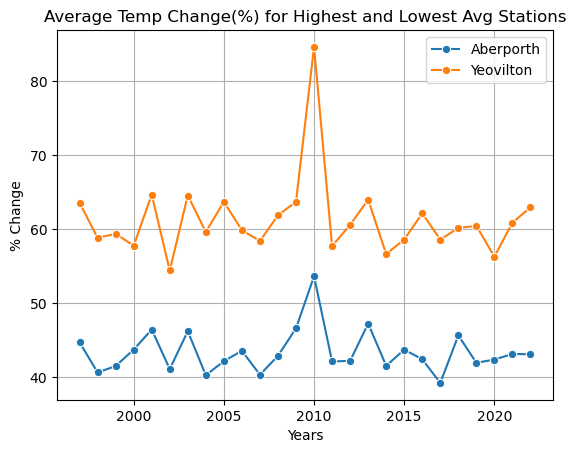

In [25]:
sns.lineplot(x='yyyy', y='Average_tempChange', data=Aberporth_avg, marker='o', label='Aberporth')
sns.lineplot(x='yyyy', y='Average_tempChange', data=Yeovilton_avg, marker='o', label='Yeovilton')

plt.xlabel('Years')
plt.ylabel('% Change')
plt.grid(True)
plt.title('Average Temp Change(%) for Highest and Lowest Avg Stations')

plt.show()

In [26]:
#create list with max temps for each station
maxTemp = []
    
for key, df in stations.items():
    result = max(df['tmax(degC)'])
    maxTemp.append((key, result))
print(maxTemp)

[('Aberporth', 21.2), ('Armagh', 23.4), ('Ballypatrick', 19.9), ('Bradford', 24.8), ('Braemar', 22.0), ('Camborne', 22.4), ('Cambridge', 28.3), ('Cardiff', 25.5), ('Chivernor', 24.2), ('Dunstaffnage', 21.3), ('Durham', 24.2), ('Eastbourne', 24.8), ('Eskdalemuir', 22.1), ('Heathrow', 28.3), ('Hurn', 25.9), ('Lerwick', 16.7), ('Leuchars', 22.0), ('Lowestoft', 24.6), ('Manston', 25.4), ('Nairn', 22.0), ('Newton Rigg', 23.3), ('Oxford', 27.4), ('Paisley', 22.8), ('Rossonwye', 26.8), ('Shawbury', 25.6), ('Sheffield', 25.6), ('Stornoway', 18.7), ('Sutton Bonington', 26.5), ('Tiree', 18.2), ('Valley', 22.0), ('Waddington', 25.8), ('Whitby', 23.4), ('Wick Airport', 18.6), ('Yeovilton', 26.0)]


In [27]:
#sort list in descending order and extract top 10 stations
desc_maxTemp = sorted(maxTemp, key= itemgetter(1), reverse=True)
print(desc_maxTemp[:10])

[('Cambridge', 28.3), ('Heathrow', 28.3), ('Oxford', 27.4), ('Rossonwye', 26.8), ('Sutton Bonington', 26.5), ('Yeovilton', 26.0), ('Hurn', 25.9), ('Waddington', 25.8), ('Shawbury', 25.6), ('Sheffield', 25.6)]


In [28]:
#creating list with top 10 stations
top_k_stations = [tup[0] for tup in desc_maxTemp[:10]]
print(top_k_stations)

top_k_data = []

#getting data from Stations dict to use in plot
for key, df in stations.items():
    if key in top_k_stations:
        #extract tmax column
        column_data = df['tmax(degC)'].tolist()
        top_k_data.append(column_data)

['Cambridge', 'Heathrow', 'Oxford', 'Rossonwye', 'Sutton Bonington', 'Yeovilton', 'Hurn', 'Waddington', 'Shawbury', 'Sheffield']


# Task 3

The below plot shows the maximum temperature distribution for the top 10 stations with the highest maximum temperature, in descending order from left to right

I chose to use a boxplot for this data because it shows the central tendency and variance for each dataset. 

To create these data views, I took the following steps:
1. Run the max function on the tmax (maximum recorded temperature) column for all datasets and store these results in a list
2. Sort the list in descending order based on the second value in each tuple
3. Create a new list with just station names to use to get relevant tmax data
4. Create a list with tmax data for each station
5. Plot using station names list for x-axis and tmax data for y-axis

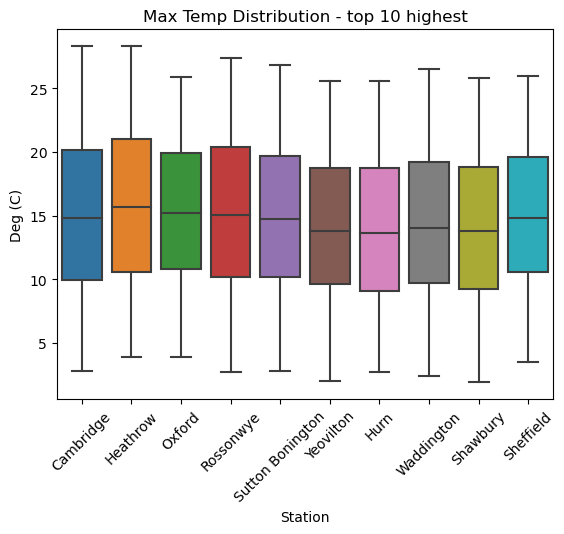

In [29]:
sns.boxplot(data=top_k_data)

plt.xticks(ticks=range(len(top_k_stations)), labels=top_k_stations, rotation=45)  # Adjust rotation as needed

plt.xlabel('Station')
plt.ylabel('Deg (C)')
plt.title('Max Temp Distribution - top 10 highest')

plt.show()

# Task 4

A surprising result is seen in the Average Temperature Change data. Both stations for the highest and lowest temperature changes showed a significant increase in the % change in 2010. Upon examining the other stations (Fig. 1), it shows that every weather station had a large increase in % temperature change in 2010. This can likely be attributed to the severe winter experienced in the UK in 2010. This winter, when compared with winters in the past 100 years, was ranked seventh coldest for the UK!  [citation](https://www.researchgate.net/publication/229584388_The_UK_winter_of_20092010_compared_with_severe_winters_of_the_last_100_years#:~:text=The%20winter%20of%202009%2F10,Prior%20and%20Kendon%2C%202011)

Another, not necessarily surprising, but important result is the trends in minimum and maximum recorded temperature over time (Fig. 2 and 3). The data shows that the average temperature per year in the UK rose on average approximately 0.5 degree Celsius from 1997-2022. This may not seem significant, but just a 1.5 degree increase in global temperature can cause disastrous effects, as outlined in [this IPCC special report](https://www.ipcc.ch/sr15/) 

The data in Fig. 1 was calculated the same way as for the % change over time in the chart for Task 2, but for all stations rather than the lowest and highest
The data in Fig. 2 and 3 was calculated by taking the mean of the tmin and tmax columns for each specified year and station

In [30]:
all_avg_tempChange = {}
#getting average temp change by year for all stations to compare over time
for key, df in stations.items():
    all_avg_tempChange[key] = calculate_avg_temp_change(stations[f'{key}'])
print(all_avg_tempChange)

{'Aberporth':       yyyy  Average_tempChange
0   1997.0           44.690881
1   1998.0           40.604032
2   1999.0           41.476957
3   2000.0           43.698591
4   2001.0           46.413193
5   2002.0           41.072784
6   2003.0           46.188642
7   2004.0           40.234071
8   2005.0           42.137276
9   2006.0           43.533796
10  2007.0           40.292855
11  2008.0           42.863243
12  2009.0           46.581162
13  2010.0           53.621777
14  2011.0           42.097114
15  2012.0           42.174219
16  2013.0           47.214523
17  2014.0           41.511177
18  2015.0           43.691415
19  2016.0           42.387486
20  2017.0           39.192420
21  2018.0           45.623850
22  2019.0           41.914387
23  2020.0           42.354097
24  2021.0           43.110915
25  2022.0           43.066602, 'Armagh':       yyyy  Average_tempChange
0   1997.0           52.757295
1   1998.0           50.601348
2   1999.0           52.848382
3   2000.0    

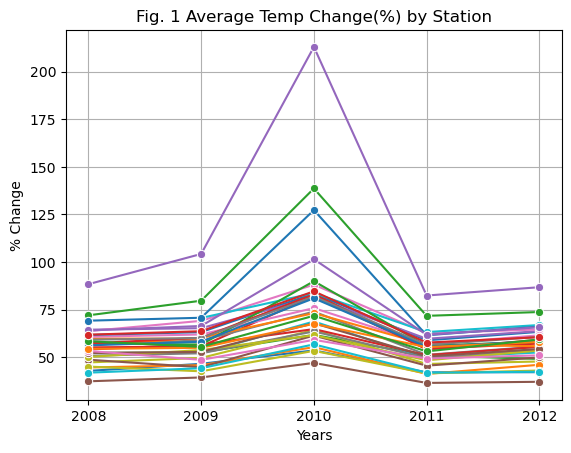

In [31]:
years_range = [2008, 2009, 2010, 2011, 2012]

for key, df in all_avg_tempChange.items():
    filtered_df = df[df['yyyy'].isin(years_range)]
    sns.lineplot(x='yyyy', y='Average_tempChange', data=filtered_df, marker='o')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('% Change')
plt.grid(True)
plt.title('Fig. 1 Average Temp Change(%) by Station')
plt.xticks(years_range)

plt.show()

In [32]:
#writing function to calculate average temps for each year and store them in separate dataframe to use for chart
def avg_by_year(df, column1, column2):
    year_sum_count = {} 
    
    #iterate throug the df and assign the columns we're taking
    for index, row in df.iterrows():
        year = row[column1]
        temp_change = row[column2]
        
        if temp_change == -5000:
            continue
        
        if year in year_sum_count:
            year_sum_count[year]['sum'] += temp_change
            year_sum_count[year]['count'] += 1
        else:
            year_sum_count[year] = {'sum': temp_change, 'count': 1}

    avg_dict = {}
    
    #calculate average for each year
    for year, data in year_sum_count.items():
        temp = data['sum'] / data['count']
        avg_dict[year] = temp
    
    #store in a dataframe
    avg_temp_df = pd.DataFrame(avg_dict.items(), columns=[column1, column2])

    return avg_temp_df

In [33]:
all_maxTemp = {}
all_minTemp = {}
for key, df in stations.items():
    all_maxTemp[key] = avg_by_year(stations[f'{key}'], 'yyyy', 'tmax(degC)')

for key, df in stations.items():
    all_minTemp[key] = avg_by_year(stations[f'{key}'], 'yyyy', 'tmin(degC)')

print(all_maxTemp)
print(all_minTemp)

{'Aberporth':       yyyy  tmax(degC)
0   1997.0   13.175000
1   1998.0   12.700000
2   1999.0   13.058333
3   2000.0   12.600000
4   2001.0   12.458333
5   2002.0   12.900000
6   2003.0   13.275000
7   2004.0   12.758333
8   2005.0   12.941667
9   2006.0   13.041667
10  2007.0   13.008333
11  2008.0   12.625000
12  2009.0   12.633333
13  2010.0   11.708333
14  2011.0   13.266667
15  2012.0   12.358333
16  2013.0   12.416667
17  2014.0   13.433333
18  2015.0   12.958333
19  2016.0   13.033333
20  2017.0   13.250000
21  2018.0   13.166667
22  2019.0   13.291667
23  2020.0   13.541667
24  2021.0   13.025000
25  2022.0   13.975000, 'Armagh':       yyyy  tmax(degC)
0   1997.0   13.733333
1   1998.0   13.350000
2   1999.0   13.425000
3   2000.0   13.475000
4   2001.0   13.275000
5   2002.0   13.616667
6   2003.0   13.858333
7   2004.0   13.766667
8   2005.0   13.791667
9   2006.0   14.325000
10  2007.0   14.425000
11  2008.0   13.508333
12  2009.0   13.458333
13  2010.0   12.708333
14  2011.

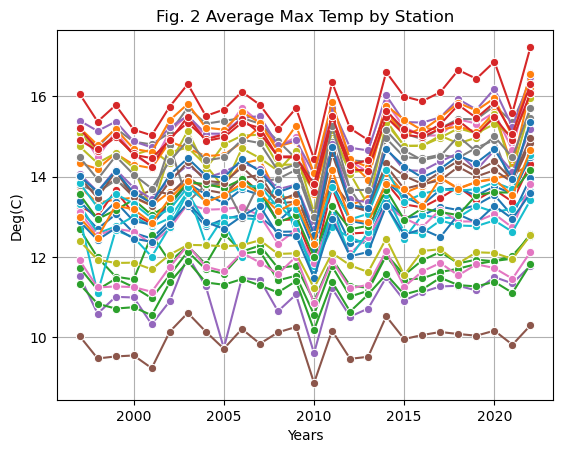

In [34]:
for key, df in all_maxTemp.items():
    sns.lineplot(x='yyyy', y='tmax(degC)', data=df, marker='o')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Deg(C)')
plt.grid(True)
plt.title('Fig. 2 Average Max Temp by Station')

plt.show()

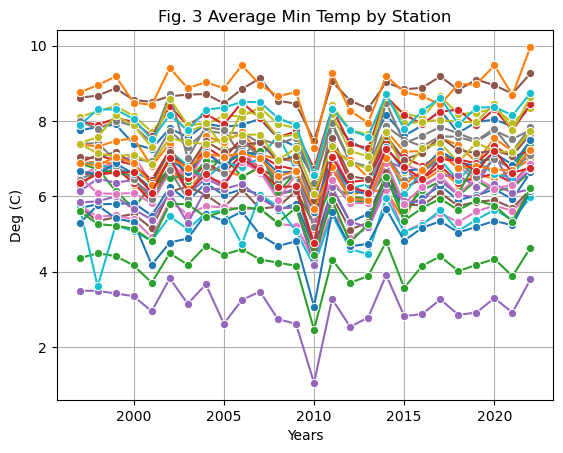

In [35]:
for key, df in all_minTemp.items():
    sns.lineplot(x='yyyy', y='tmin(degC)', data=df, marker='o')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Deg (C)')
plt.grid(True)
plt.title('Fig. 3 Average Min Temp by Station')

plt.show()

# Part 5

Much of this data is consistent with other UK data as well as globally recorded data. With regard to the surprising result of % temperature change in 2010, data from [UK.gov](https://www.gov.uk/government/statistics/energy-trends-section-7-weather) shows that the winter months of January, February, and March in 2010 were approximately 1.8 degrees C colder than the same months for 2009 and 2011.


With regard to general temperature increase, data from [UK.gov](https://www.gov.uk/government/statistics/energy-trends-section-7-weather) also shows a 0.5 degree C increase in annual average temperature from 1997-2022. Globally, data from the [National Oceanic and Atmospheric Administration](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series_) reported an approximately 0.6 degree increase in temperature from 1997 to 2022. 

It is important to compare data from multiple sources because each source may record and handle their data differently. In the Met Office data, there were many values that were missing or stations that had closed and were no longer recording data. Without proper data handling this can significatly skew results. It can be helpful to compare results to other sources to substantiate claims.

# References

Pandas: https://pandas.pydata.org/

NumPy: https://numpy.org/

Matplotlib: https://matplotlib.org/

Seaborn: https://seaborn.pydata.org/

Research Gate: https://www.researchgate.net/publication/229584388_The_UK_winter_of_20092010_compared_with_severe_winters_of_the_last_100_years#:~:text=The%20winter%20of%202009%2F10,Prior%20and%20Kendon%2C%202011

IPCC: https://www.ipcc.ch/sr15/

NCEI: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

# Challenges

One challenge I encountered during the development of my application is how best to structure and store my dataframes. I decided to utilize dynamic programming by storing my dataframes in dictionaries. This way I could store all my dataframes in groups that would identify where in the cleaning process the dataframes were, and allowed me to iterate through these dictionaries to perform functions and calculations rather than creating and looping through new variables. This kept my data more neat as well since I didnt need as many lines for storing all my variables.

With regard to structuring my dataframes, I had initially decided to create separate dataframes for each column in each station/dataset. I later realized that that was causing me more issues as I had many more dictionaries to handle and was performing calculations between datframes in separate dictionaries, rather than between columns in one dataframe. I therefore decided to restructure my code to not separate out each column and keep each dataframe fully intact. Then for my calculations I referenced the columns in each dataset directly, which proved to be more straightforward for how I wanted to go about things. In a previous version of my code, I had created a number of dictionaries and variables dynamically. Since I decided to change things around somewhat last minute, I decided to just manually write out the keys for my new dictionaries to avoid any additional errors.

For future iterations I would like to get a better understanding of how to utilize dictionaries and lists to make sure I'm storing my data as effectively as possible. I had little to no knowledge of programming before beginning this assignment, so learned a lot by thinking about an easier or faster way I wanted to do something and then utilizing the internet to learn different methods of how to achieve my goal. While this was a great learning experience and I feel I have gained a lot of skills and better understand how to go about tasks like these, I want to work more on truly understanding the purpose and decision behind the use of various data structures. 

# Ethical Implications

I do not see any significant overall ethical impliations of my data use. This data is publicly available, and rightly so, as the general public should be allowed to know what data is being captured and how it is being handled by the organizations that are putting out statements regarding the state of our planet.

The scientific integrity of my design is not as accurate as it could be. For example, there are a number of ways to calculate the average percent change over a series of values. My chosen calculation may not be the most accurate to properly determine temperature change over time. This may lead to others drawing inaccurate conclusions if they do not fully understand what my data is showing. While the other calculations are sound in that they are simple mean calculations, there is not always consistent data for all stations and measurements. For example, many stations are missing data from certain time periods. I chose to exclude that data from my final calculations, rather than replacing with 0 which would have negatively skewed results. While my method doesn't skew results by adding an incorrect value, it cannot always be treated as equal to the data from other stations because not all stations have the same amount of data points. 

Data analytics in a human and social context enables us to understand the world and has allowed for more informed decision-making processes across various industries. It allows us to be aware of our impact on the Earth and society and to understand how different aspects of our world our connected. While having access to data can be very beneficial,  it also raises concerns about privacy, bias, and ethical use. As we generate more and more data, it is necessary that those who are working with data and drawing conclusions from it are constantly assessing their methodologies and motives to ensure they are disseminating accurate information and protecting individual rights.